<a href="https://colab.research.google.com/github/rujhannajib/rujhan_ndl/blob/Stock-Market-Optimization/Rujhan_NDL_StockMarketOptimization_LAB(2_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/i0iFOkM.jpg">

In [ ]:
# Prepared by Nittany Data Lab. Modified by me.

## stock market libraries

In [ ]:
# Installing libraries
!pip install yfinance quantstats pyportfolioopt

In [4]:
# Importing Other Libraries

# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
# import ta
import yfinance as yf

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# hiding warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

## Daily Returns

In [5]:
# Getting daily returns for US stocks in a time window
ticker = qs.utils.download_returns("SONY")
ticker = ticker.loc["2018-01-01":"2024-02-02"]
ticker

[*********************100%%**********************]  1 of 1 completed


Date
2018-01-02    0.018687
2018-01-03    0.011138
2018-01-04    0.020518
2018-01-05    0.030688
2018-01-08    0.006160
                ...   
2024-01-29    0.019184
2024-01-30    0.001851
2024-01-31    0.003593
2024-02-01    0.011662
2024-02-02   -0.003337
Name: Close, Length: 1532, dtype: float64

In [6]:
# Calculating Standard Deviations
standard_deviation = ticker.std().round(2)
print("Sony STD:",standard_deviation)

Sony STD: 0.02


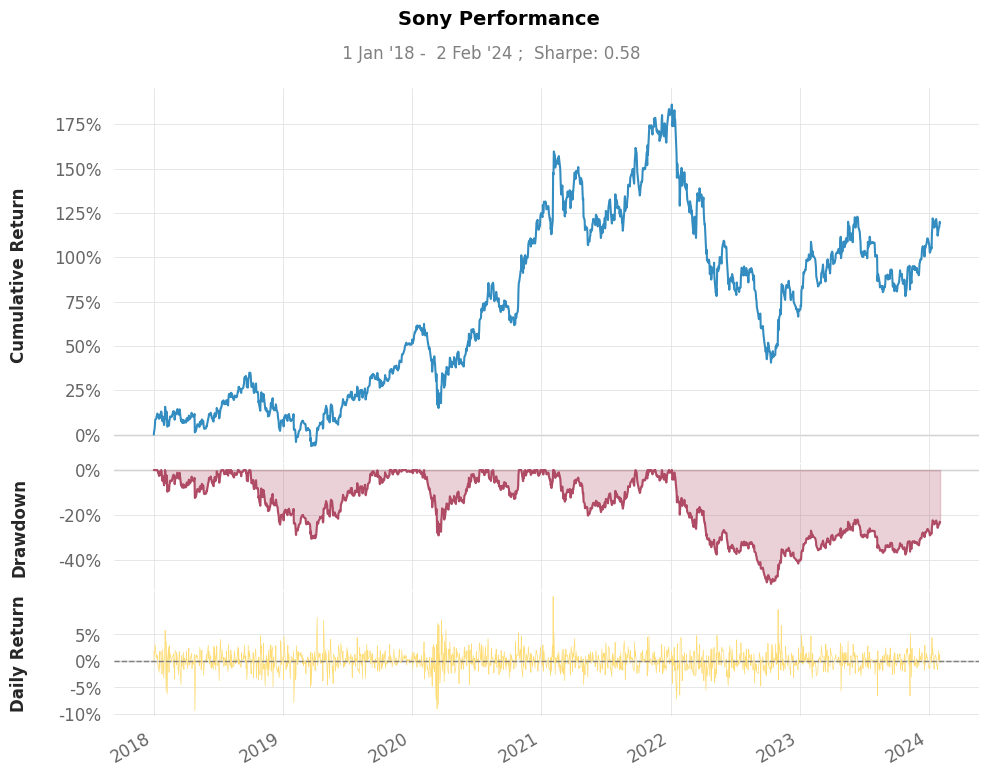

In [7]:
# Plotting Daily Returns for each stock
qs.plots.snapshot(ticker, title="Sony Performance")

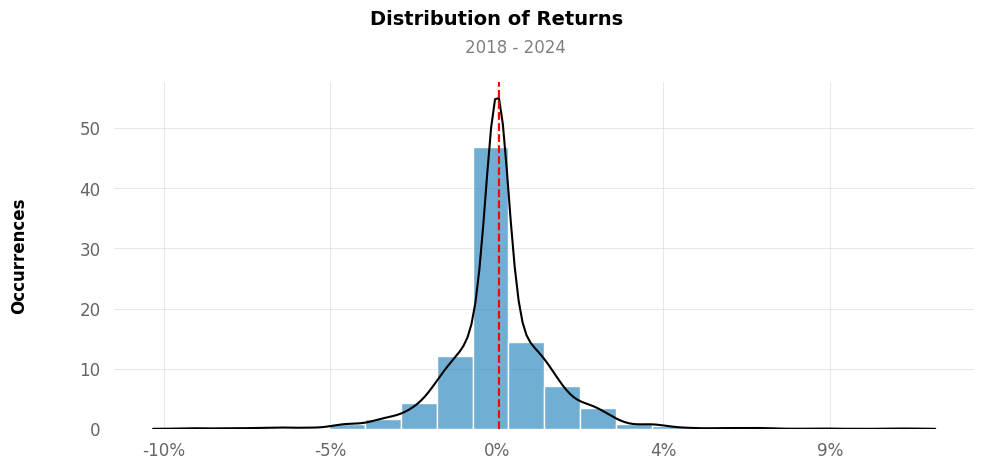

In [8]:
# Plotting histograms for daily returns
qs.plots.histogram(ticker, resample="D")

In [9]:
# Using quantstats to measure kurtosis
kurtosis = qs.stats.kurtosis(ticker).round(4)
print(f"Sony Kurtosis: {kurtosis}") # risky > 3

Sony Kurtosis: 3.8343


In [10]:
# Measuring skewness with quantstats
skewness = qs.stats.skew(ticker).round(4)
print(f"Sony's Skewness: {skewness}") # Slight skewness +-.5

Sony's Skewness: 0.0434


In [11]:
# Calculating Sharpe ratio
# corrects return of an investment based on its degree of risk
sr = qs.stats.sharpe(ticker).round(4)
print(f"Sony's Sharpe Ratio: {sr}")

Sony's Sharpe Ratio: 0.5835


In [16]:
# Create generate report function
def generate_report(name, data):
  print(f"Report for {name}")
  standard_deviation = data.std().round(2)
  print(f"{name} STD:",standard_deviation)
  kurtosis = qs.stats.kurtosis(data).round(4)
  print(f"{name} Kurtosis: {kurtosis}") # risky > 3
  skewness = qs.stats.skew(data).round(4)
  print(f"{name}'s Skewness: {skewness}") # Slight skewness +-.5
  sr = qs.stats.sharpe(data).round(4)
  print(f"{name}'s Sharpe Ratio: {sr}")

In [17]:
generate_report("SONY",ticker)

Report for SONY
SONY STD: 0.02
SONY Kurtosis: 3.8343
SONY's Skewness: 0.0434
SONY's Sharpe Ratio: 0.5835


## SP 500

In [18]:
# Loading data from the SP500, the american benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2010-07-01':'2024-02-03']
sp500

[*********************100%%**********************]  1 of 1 completed


Date
2010-07-01   -0.003240
2010-07-02   -0.004662
2010-07-06    0.005359
2010-07-07    0.031331
2010-07-08    0.009413
                ...   
2024-01-29    0.007557
2024-01-30   -0.000601
2024-01-31   -0.016106
2024-02-01    0.012494
2024-02-02    0.010684
Name: Close, Length: 3421, dtype: float64

In [19]:
generate_report("SP500",sp500)

Report for SP500
SP500 STD: 0.01
SP500 Kurtosis: 12.9097
SP500's Skewness: -0.5006
SP500's Sharpe Ratio: 0.7535


## Financial Portfolio

In [20]:
ticker1 = qs.utils.download_returns("NTDOY")
ticker1 = ticker1.loc["2010-01-01":"2024-03-02"]
# ticker1
# ---------------------------------------------
ticker2 = qs.utils.download_returns("AAL")
ticker2 = ticker2.loc["2010-01-01":"2024-03-02"]
# ticker2
# ---------------------------------------------
ticker3 = qs.utils.download_returns("SONY")
ticker3 = ticker3.loc["2010-01-01":"2024-03-02"]
# ticker
# ---------------------------------------------
ticker4 = qs.utils.download_returns("TSM")
ticker4 = ticker4.loc["2010-01-01":"2024-03-02"]
# ticker
# ---------------------------------------------
ticker5 = qs.utils.download_returns("NVDA")
ticker5 = ticker5.loc["2010-01-01":"2024-03-02"]
# ticker
# ---------------------------------------------

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [21]:
# Define Financial Portfolio
# weights = # Defining weights for each stock
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
# portfolio = # Creating portfolio multiplying each stock for its respective weight
portfolio = (weights[0] * ticker1) + (weights[1] * ticker2) + (weights[2] * ticker3) + (weights[3] * ticker4) + (weights[4] * ticker5)
# portfolio # Displaying portfolio's daily returns
portfolio # Displaying portfolio's daily returns

Date
2010-01-04    0.011799
2010-01-05    0.027455
2010-01-06    0.002775
2010-01-07    0.001480
2010-01-08    0.004036
                ...   
2024-01-29    0.010025
2024-01-30   -0.002490
2024-01-31   -0.013157
2024-02-01    0.014267
2024-02-02    0.017490
Name: Close, Length: 3545, dtype: float64

In [22]:
# Generating report on portfolio performance
# standard_deviation = ticker.std().round(2)
# print("Portfolio STD:",standard_deviation)

# sr = qs.stats.sharpe(portfolio).round(4)
# print(f"Portfolio's Sharpe Ratio: {sr}")

generate_report("Portfolio",portfolio)

Report for Portfolio
Portfolio STD: 0.02
Portfolio Kurtosis: 4.246
Portfolio's Skewness: 0.1843
Portfolio's Sharpe Ratio: 0.8756


## Optimizing

In [23]:
# Getting dataframes info for Stocks using yfinance
stocks_df = yf.download(["TSM","AAL","NTDOY","SONY","NVDA"], start="2010-01-01", end="2024-03-02")["Adj Close"]
stocks_df

[*********************100%%**********************]  5 of 5 completed


Ticker,AAL,NTDOY,NVDA,SONY,TSM
Date,,,,,
2010-01-04,4.496878,6.180,4.240427,30.020000,7.458040
2010-01-05,5.005956,6.294,4.302350,29.879999,7.425840
2010-01-06,4.798553,6.630,4.329869,29.850000,7.400077
2010-01-07,4.939966,6.844,4.245016,29.799999,7.155338
2010-01-08,4.845691,6.964,4.254189,30.410000,7.148901
...,...,...,...,...,...
2024-01-29,14.940000,13.700,624.650024,97.220001,116.980003
2024-01-30,14.530000,13.920,627.739990,97.400002,116.059998
2024-01-31,14.230000,13.890,615.270020,97.750000,112.959999


<h2 id = 'markowitz' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Markowitz Mean-Variance Optimization Model</h2>

In [25]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(stocks_df)
S = risk_models.sample_cov(stocks_df)


In [26]:
# Visualizing the annualized expected returns
mu

Ticker
AAL      0.087131
NTDOY    0.061416
NVDA     0.432019
SONY     0.088207
TSM      0.215290
dtype: float64

In [27]:
# Visualizing the covariance matrix
S

Ticker,AAL,NTDOY,NVDA,SONY,TSM
Ticker,,,,,
AAL,0.271027,0.025967,0.067100,0.040868,0.046230
NTDOY,0.025967,0.142447,0.037970,0.037901,0.027141
NVDA,0.067100,0.037970,0.201103,0.052807,0.072974
SONY,0.040868,0.037901,0.052807,0.101470,0.036924
TSM,0.046230,0.027141,0.072974,0.036924,0.085617


In [28]:
# Optimizing for maximal Sharpe ratio
# Providing expected returns and covariance matrix as input
ef = EfficientFrontier(mu, S)
# Optimizing weights for Sharpe ratio maximization
weights = ef.max_sharpe()
weights

OrderedDict([('AAL', 0.0),
             ('NTDOY', 0.0),
             ('NVDA', 0.6954568179470971),
             ('SONY', 0.0),
             ('TSM', 0.304543182052903)])

In [29]:
# clean_weights rounds the weights and clips near-zeros
clean_weights =  ef.clean_weights()
# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('AAL', 0.0),
             ('NTDOY', 0.0),
             ('NVDA', 0.69546),
             ('SONY', 0.0),
             ('TSM', 0.30454)])

In [38]:
clean_weights.values()

odict_values([0.0, 0.0, 0.69546, 0.0, 0.30454])

In [50]:
# Creating new portfolio with optimized weights
new_weights = clean_weights.values()
optimized_portfolio = (list(new_weights) * stocks_df)
optimized_portfolio = optimized_portfolio.sum(axis=1)
optimized_portfolio # Visualizing daily returns

Date
2010-01-04      5.220319
2010-01-05      5.253577
2010-01-06      5.264870
2010-01-07      5.131325
2010-01-08      5.135744
                 ...    
2024-01-29    470.044196
2024-01-30    471.912965
2024-01-31    462.296526
2024-02-01    472.859378
2024-02-02    495.366824
Length: 3545, dtype: float64

In [51]:
# Displaying new reports comparing the optimized portfolio to the first portfolio constructed
generate_report("Optimized Portfolio", optimized_portfolio)

Report for Optimized Portfolio
Optimized Portfolio STD: 89.67
Optimized Portfolio Kurtosis: 7.4826
Optimized Portfolio's Skewness: 0.3524
Optimized Portfolio's Sharpe Ratio: 1.06
